In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.data_processing import (
    load_dataset, 
    save_dataset,
    remove_duplicates_and_empty_rows,
    check_if_column_is_unique_per_row,
    predict_missing_values_with_linear_regression,
    get_outliers_IRQ,
    get_distinct_rows_from_dataframes,
    predict_next_month_average_ARIMA,
    predict_next_month_average_QR,
    predict_next_month_average_SW,
    BRONZE_PATH,
    SILVER_PATH,
    GOLD_PATH,
    GROUP_FILENAME,
    POSTS_FILENAME
)
from utils.data_visualization import (
    analyse_categorical_features,
    analyse_numerical_features,
    analyse_numerical_features_per_category,
    plot_correlation_matrices,
    plot_scatter_graph,
    analyse_aggregated_features_per_category,
    analyse_features_trend
)

In [2]:
posts_df_aggregated = load_dataset(GOLD_PATH + "posts_and_group_df_with_new_metrics_agg_by_date", "parquet")

## Prediction of `reach` and `clicks` for the next month:

According to the data and patterns investigation done:
- Provided data has no seasonal trend or visible patterns vary by date.
- In total `reach`, `likes`, `click` averages are correlated with average comments number per date.
- unique_reach is highly correlated with `click` and `likes`.
- `reach_growth_rate` is sligtly affected with total average of `likes` and `click`.
- There are correlations within daily average of main metrics according to Pearson and Spearman.
- `reach` and `likes` features contains a lot of outliers and are not normaly distributed in general.
- Data is stationary.

Due to this considerations Sliding Average and ARIMA are chosen to predict an average `reach` and `likes` metrics for the next month.

## 1. ARIMA Prediction:

### `reach` prediction:

We will try to use ARIMA to predict average `reach` per day based on existing aggregated data.

Firstly, trying to apply AUTO_ARIMA for automatic parameters detection:

DF test results:
ADF Test Statistic : -9.744495283101068
p-value : 8.325512713654906e-17
#Lags Used : 0
Number of Observations Used : 90
Time series is stationary.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2079.690, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2072.053, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2073.875, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2074.044, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2440.399, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2075.937, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.448 seconds


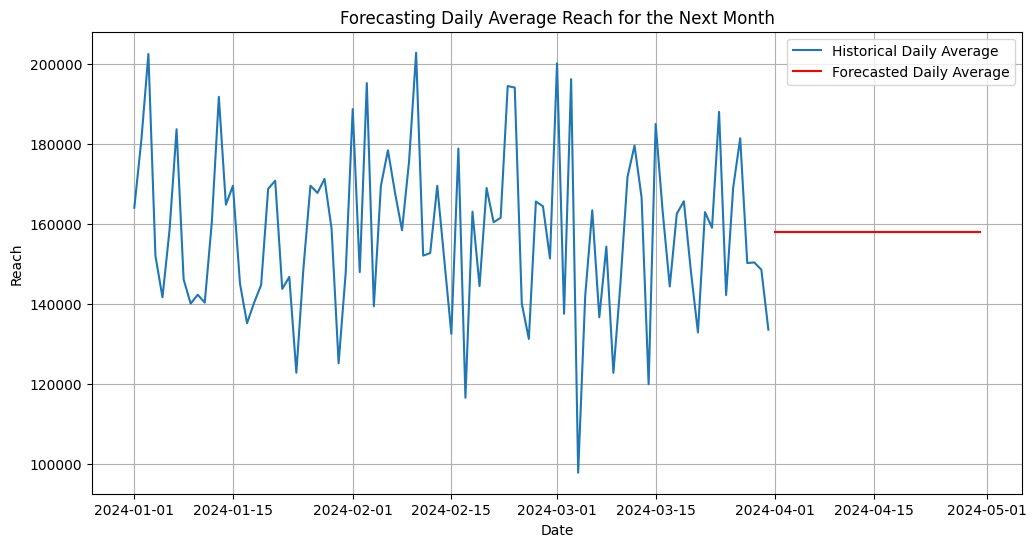

In [3]:
prediction = predict_next_month_average_ARIMA(posts_df_aggregated, 'reach', order=(0, 0, 0))

Trying ARIMA with fixed random parameters:

DF test results:
ADF Test Statistic : -9.744495283101068
p-value : 8.325512713654906e-17
#Lags Used : 0
Number of Observations Used : 90
Time series is stationary.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2079.690, Time=1.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2072.053, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2073.875, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2074.044, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2440.399, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2075.937, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.152 seconds


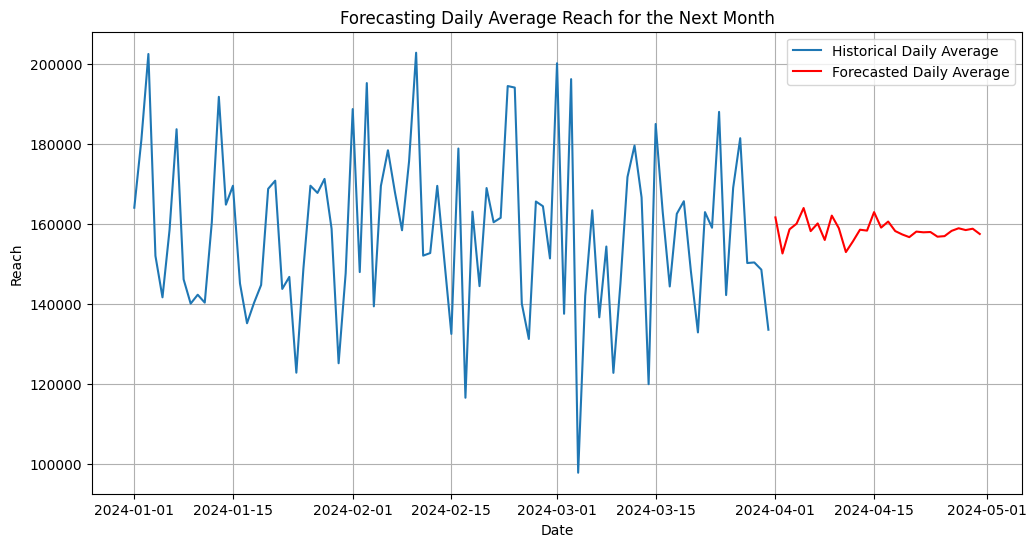

In [4]:
prediction = predict_next_month_average_ARIMA(posts_df_aggregated, 'reach', order=(15, 0, 1))

### `likes` prediction:

Prediction of `likes` with AUTO_ARIMA:

DF test results:
ADF Test Statistic : -11.209860650378907
p-value : 2.1388809284108817e-20
#Lags Used : 0
Number of Observations Used : 90
Time series is stationary.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1551.267, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1546.465, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1545.268, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1545.508, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1842.543, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1547.269, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1547.307, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1549.297, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1625.052, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.013 seconds


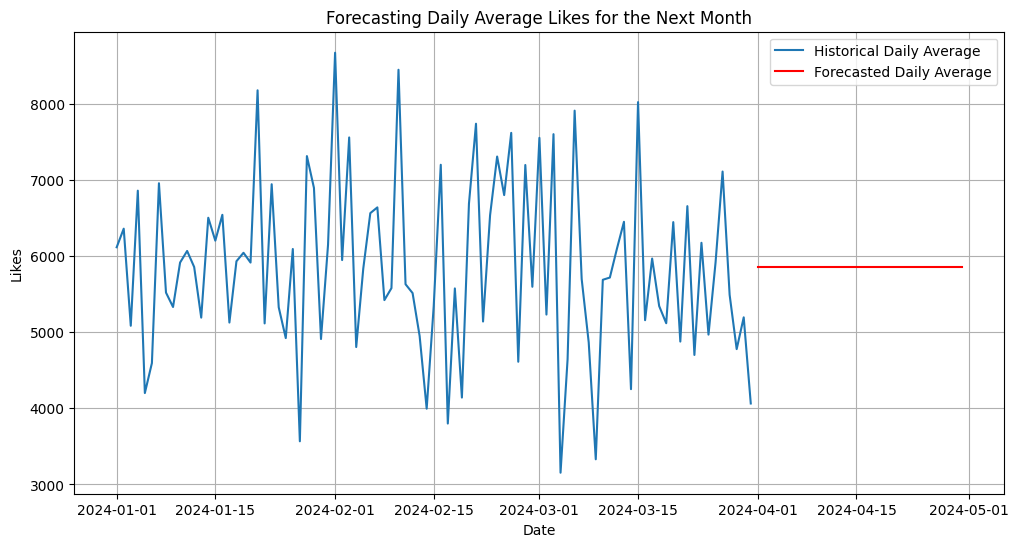

In [5]:
prediction = predict_next_month_average_ARIMA(posts_df_aggregated, 'likes', order=(0, 0, 0), information_criterion='aic')

Random ARIMA parameters for `likes`:

DF test results:
ADF Test Statistic : -11.209860650378907
p-value : 2.1388809284108817e-20
#Lags Used : 0
Number of Observations Used : 90
Time series is stationary.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1551.267, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1546.465, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1545.268, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1545.508, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1842.543, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1547.269, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1547.307, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1549.297, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1625.052, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.039 seconds


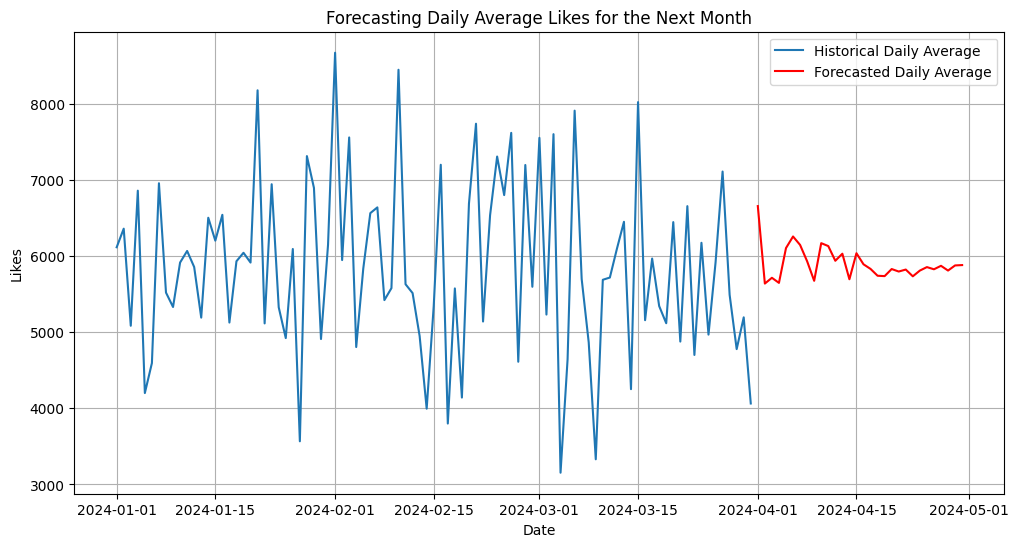

In [6]:
prediction = predict_next_month_average_ARIMA(posts_df_aggregated, 'likes', order=(15, 0, 1), information_criterion='aic')

## 2. Sliding Average Prediction:

### `reach` prediction:

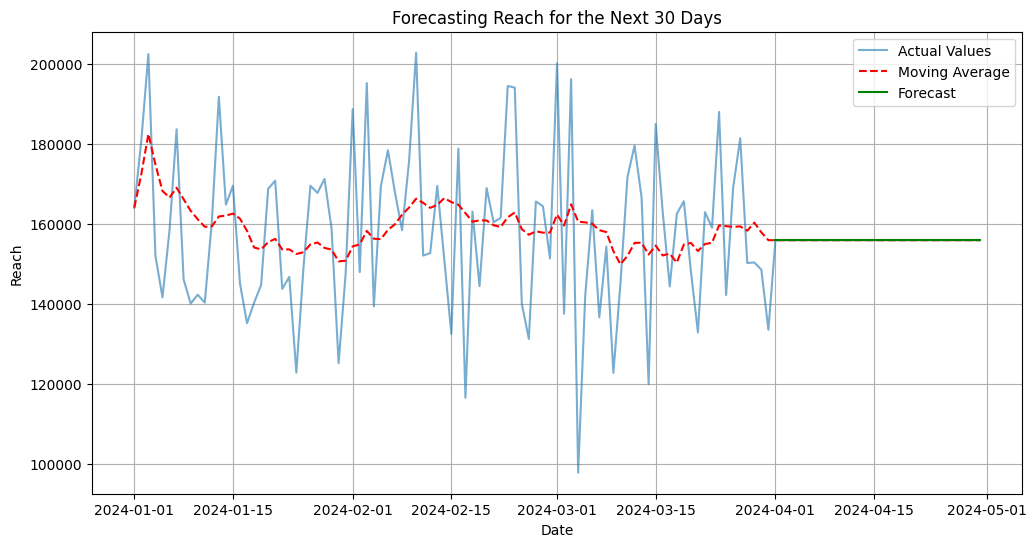

,reach,moving_average
2024-01-01,163968.779815,163968.779815
2024-01-02,180856.462722,172412.621269
2024-01-03,202380.138800,182401.793779
2024-01-04,151933.894766,174784.819026
2024-01-05,141582.011184,168144.257457
...,...,...
2024-04-26,155857.067106,155857.067106
2024-04-27,155857.067106,155857.067106
2024-04-28,155857.067106,155857.067106
2024-04-29,155857.067106,155857.067106


In [7]:
predict_next_month_average_SW(posts_df_aggregated, 'reach', 15)

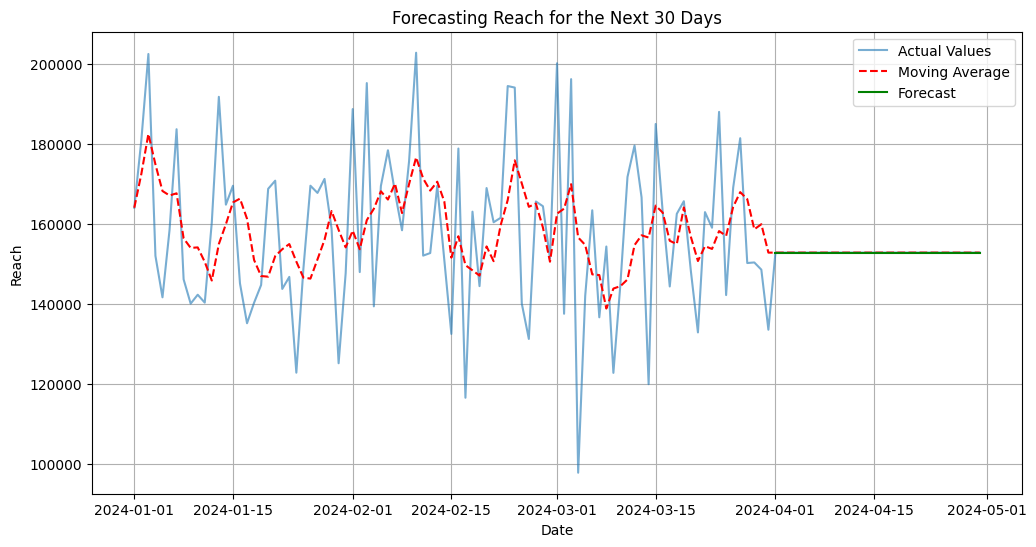

,reach,moving_average
2024-01-01,163968.779815,163968.779815
2024-01-02,180856.462722,172412.621269
2024-01-03,202380.138800,182401.793779
2024-01-04,151933.894766,174784.819026
2024-01-05,141582.011184,168144.257457
...,...,...
2024-04-26,152751.275110,152751.275110
2024-04-27,152751.275110,152751.275110
2024-04-28,152751.275110,152751.275110
2024-04-29,152751.275110,152751.275110


In [8]:
predict_next_month_average_SW(posts_df_aggregated, 'reach', 5)

`likes` prediction:

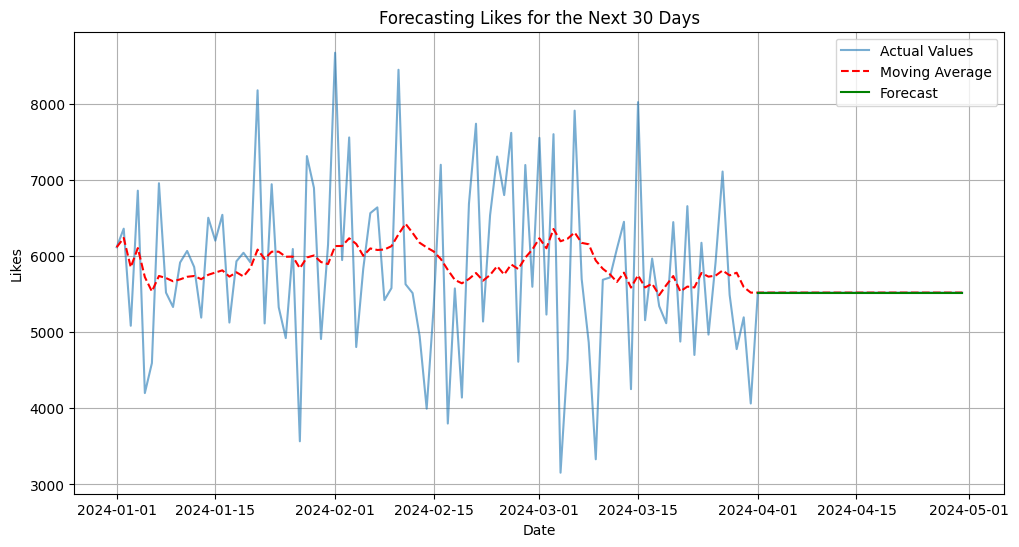

,likes,moving_average
2024-01-01,6113.933170,6113.933170
2024-01-02,6357.995599,6235.964385
2024-01-03,5083.343645,5851.757471
2024-01-04,6856.771378,6103.010948
2024-01-05,4200.212960,5722.451351
...,...,...
2024-04-26,5518.675805,5518.675805
2024-04-27,5518.675805,5518.675805
2024-04-28,5518.675805,5518.675805
2024-04-29,5518.675805,5518.675805


In [9]:
predict_next_month_average_SW(posts_df_aggregated, 'likes', 15)

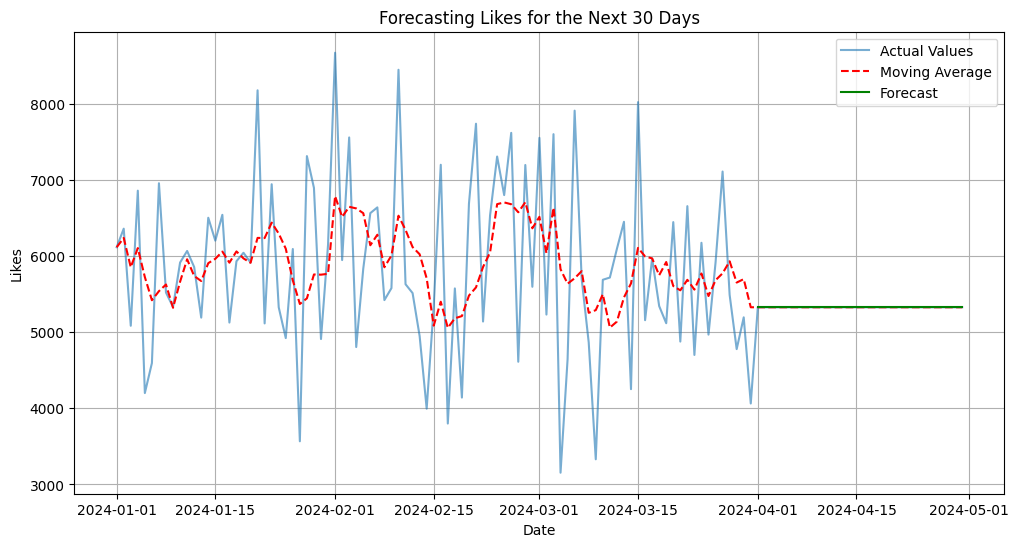

,likes,moving_average
2024-01-01,6113.933170,6113.933170
2024-01-02,6357.995599,6235.964385
2024-01-03,5083.343645,5851.757471
2024-01-04,6856.771378,6103.010948
2024-01-05,4200.212960,5722.451351
...,...,...
2024-04-26,5326.186211,5326.186211
2024-04-27,5326.186211,5326.186211
2024-04-28,5326.186211,5326.186211
2024-04-29,5326.186211,5326.186211


In [13]:
predict_next_month_average_SW(posts_df_aggregated, 'likes', 5)

## Conlusion:

TODO [!!!]